# Creating a randomized augmentation during training

While training, if a monai transform chain is defined. It so happens that all the images go through the same transformations. All the transformations are vector quantities, so switching the order of transforms will generate a new augmentation. In the present implementation if you apply any transform more than once, you need to write it multiple times. Instead we are proposing is that the users can specify a dictionary of name of transformation (like rotate, flip or translate etc) and the frequency of transformation (an integer like 1, 2, ). The Augmentation class will then generate random transformation chain on the fly during training. 
One of the cons of this approach is that the cache method probably cannot be used as the transformations are being generated at random 


Import the libraries

In [43]:
import glob
from matplotlib import pyplot as plt
import numpy as np
from randomizedPermutations import AugmentData

from monai.transforms import LoadImage, Compose, Resize, ScaleIntensity, AddChannel

### Generate the image list

In [44]:
image_dir = './exampleImages'
image_file_list = glob.glob(image_dir + '/*.png')
out_size = (200, 200)

# Check the image dimensions and number of channels
img = LoadImage(image_only=True)(image_file_list[0])
print(img.shape, np.min(img), np.max(img))


(278, 512) 0.0 255.0


As one can see that the image has no channels and the size is not standard, we need to add a channel and resize the image. 
Because the image intensity is between 0 and 255, we need to scale the intensity between 0 and 1. 

In [45]:
image_loading_transform_list = [LoadImage(image_only=True), AddChannel(), Resize(out_size), ScaleIntensity()]
img = Compose(image_loading_transform_list)(image_file_list[0])
print('Shape ', img.shape)
print('Intensity (min, max)', np.min(img), np.max(img))

Shape  (1, 200, 200)
Intensity (min, max) 0.0 1.0


In [46]:
# Set of image transforms needed for appropriately loading the image 
image_loading_transforms = [LoadImage(image_only=True), AddChannel(), Resize(out_size)]

batch_size = 5
# Set of augmentations need to be applied
image_augmentation_dict = {'rotate': 3, 'flip': 2, 'rotate90': 4}
img = AugmentData(
        image_loading_transforms,
        augmentation_dict=image_augmentation_dict,
        output_size=out_size,
        batch_size=batch_size,
        num_augmentations=3,
    )(image_file_list)
print(img.shape)

(5, 1, 200, 200)


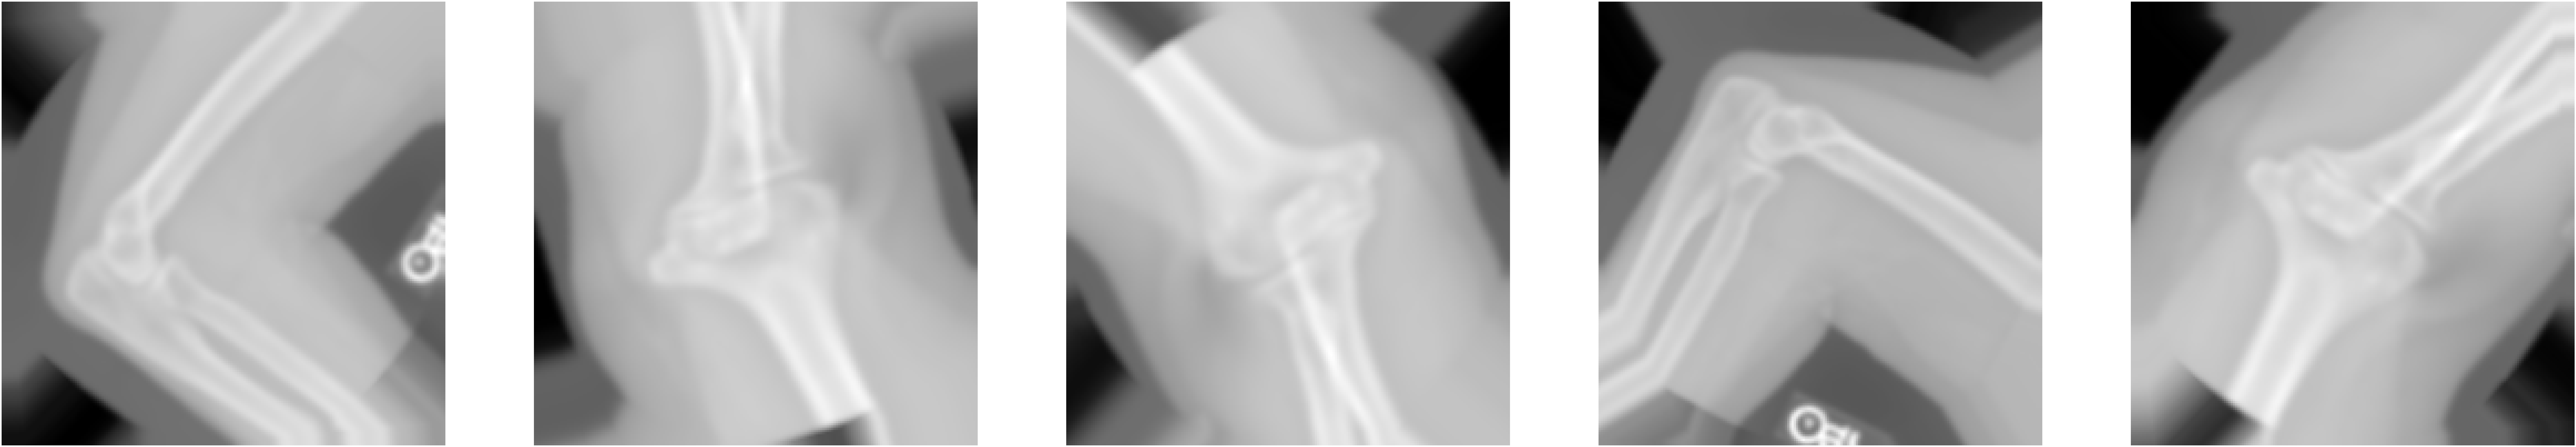

In [49]:
# Check the augmentations 
fig = plt.figure(figsize=out_size)

for i in range(1, batch_size+1):
    fig.add_subplot(1, batch_size, i)
    # Making these transforms to put the axis at the end, followed by copying the elements
    # to 3 channels for GRAY Scale representation
    a = np.repeat(np.transpose(img[i-1, :, :, :], [1, 2, 0]), repeats=3, axis=2)
    plt.imshow(a)
    plt.axis('off')